In [106]:
import dgl.function as fn
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import AvgPooling, GNNExplainer
from dgl.dataloading import GraphDataLoader
from dgl.data import TUDataset

In [96]:
data = TUDataset('MUTAG')

In [101]:
# Define a model
class Model(nn.Module):
    def __init__(self, in_feats, out_feats):
        super(Model, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.pool = AvgPooling()
    def forward(self, graph, feat, eweight=None):
        with graph.local_scope():
            feat = self.linear(feat)
            graph.ndata['h'] = feat
            if eweight is None:
                graph.update_all(fn.copy_u('h', 'm'), fn.sum('m', 'h'))
            else:
                graph.edata['w'] = eweight
                graph.update_all(fn.u_mul_e('h', 'w', 'm'), fn.sum('m', 'h'))
            return self.pool(graph, graph.ndata['h'])

In [102]:
dataloader = GraphDataLoader(data, batch_size=64, shuffle=True)

In [293]:
# # Train the model
# model = Model(10, 2)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
# for bg, labels in dataloader:
#     feats = torch.randn((bg.num_nodes(), 10))
#     logits = model(bg, feats)
#     loss = F.cross_entropy(logits, labels)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

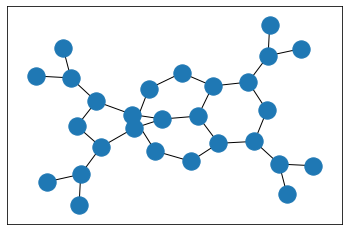

In [292]:
import networkx as nx

g = data[5][0]
nx_G = g.to_networkx().to_undirected()
pos = nx.kamada_kawai_layout(nx_G)
nx.draw_networkx(nx_G, pos, with_labels=False)